# **Animal Classification Model**

* Model trained here has accuracy of 98% among the following classes
* Classifies animal - bear, bird, cat, cow, deer, dog, dolphin, elephant, giraffe, horse, kangaroo, lion, panda, tiger, zebra



## **Download the model from drive**

In [1]:
!pip install gdown
!gdown https://drive.google.com/uc?id=1onjlzOnvQ4JSnoHvsSG1ogk4ZBdBUT9n -O animal_classifier.pth

Downloading...
From (original): https://drive.google.com/uc?id=1onjlzOnvQ4JSnoHvsSG1ogk4ZBdBUT9n
From (redirected): https://drive.google.com/uc?id=1onjlzOnvQ4JSnoHvsSG1ogk4ZBdBUT9n&confirm=t&uuid=efc10247-1cdd-467e-979b-785495a84439
To: /content/animal_classifier.pth
100% 94.5M/94.5M [00:03<00:00, 30.3MB/s]


## **Define required functions**

In [2]:
import torch
from torch import nn
from torchvision import transforms, models
from PIL import Image
from matplotlib import pyplot as plt
from google.colab import files

# Define the device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Load the saved model
model = models.resnet50()
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 15)  # Adjust to the number of classes in your dataset
model.load_state_dict(torch.load('animal_classifier.pth', map_location=device))
model = model.to(device)
model.eval()

# Define transformations (same as used during training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Function to load and preprocess the image
def load_image(image_path):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add batch dimension
    return image.to(device)

# Function to predict the class of the image
def predict(image_path):
    image = load_image(image_path)
    with torch.no_grad():
        outputs = model(image)
        _, predicted = torch.max(outputs, 1)
    return predicted.item()

# Name of different animal
class_names = ['bear','bird','cat','cow','deer','dog','dolphin','elephant','giraffe','horse','kangaroo','lion','panda','tiger','zebra']

# Test the model on an input image
def find(image_path):
    # Load and preprocess the image
    predicted_class = predict(image_path)
    print(f'Predicted class: {class_names[predicted_class]}')

    # Display the image
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f'Predicted class: {class_names[predicted_class]}')
    plt.axis('off')
    plt.show()

## **Upload image files**

In [7]:
uploaded = files.upload()

Saving test4.jpg to test4.jpg
Saving test3.jpg to test3.jpg
Saving test2.jpg to test2.jpg
Saving test1.jpg to test1.jpg


## **Test the uploaded images**

Predicted class: tiger


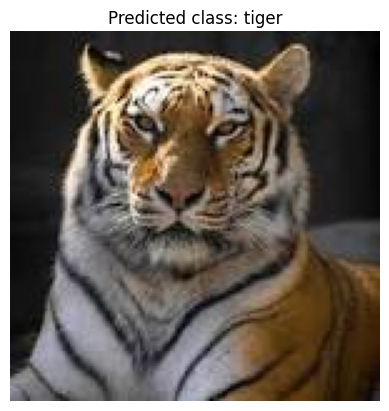

In [8]:
find('test1.jpg')

Predicted class: bear


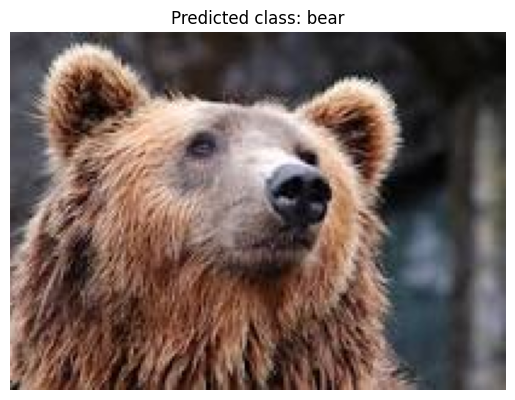

In [9]:
find('test2.jpg')

Predicted class: bird


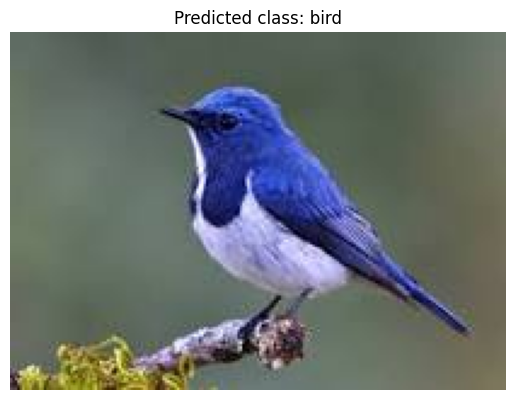

In [10]:
find('test3.jpg')

Predicted class: panda


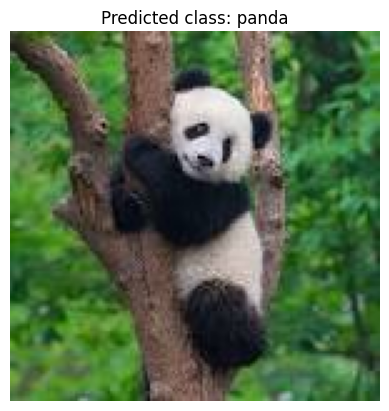

In [11]:
find('test4.jpg')